In [ ]:
#This installation line is for Jupyter notebook environment.
#!pip install matplotlib pandas numpy scikit-learn yfinance --quiet

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
ticker = 'AAPL'  # Apple stock
data = yf.download(ticker, start='2020-01-01', end='2025-01-01')
print()
print(data.head())
print(data.shape)

/tmp/ipython-input-824636746.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400
2020-01-03  71.833313  72.594079  71.608707  71.765690  146322800
2020-01-06  72.405693  72.444336  70.703027  70.954203  118387200
2020-01-07  72.065170  72.671364  71.845392  72.415360  108872000
2020-01-08  73.224411  73.526303  71.768086  71.768086  132079200
(1258, 5)


- Only 'Close' data is taken from the dataset. A copy of Close data (Next_Close) is made by shifting the data by 1 day before. Now this Next_Close is taken as target for Close so that next day's closing share value can be predicted based on today's closing price.

In [23]:
data = data[['Close']]

# Create next-day target
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row (no target)
data = data[:-1]

print(data.head())

print(data.shape)

Price           Close Next_Close
Ticker           AAPL           
Date                            
2020-01-02  72.538513  71.833313
2020-01-03  71.833313  72.405693
2020-01-06  72.405693  72.065170
2020-01-07  72.065170  73.224411
2020-01-08  73.224411  74.779762
(1257, 2)


In [24]:
X = data[['Close']]
y = data['Next_Close']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)

(1005, 1) (252, 1)


In [25]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 8.4640


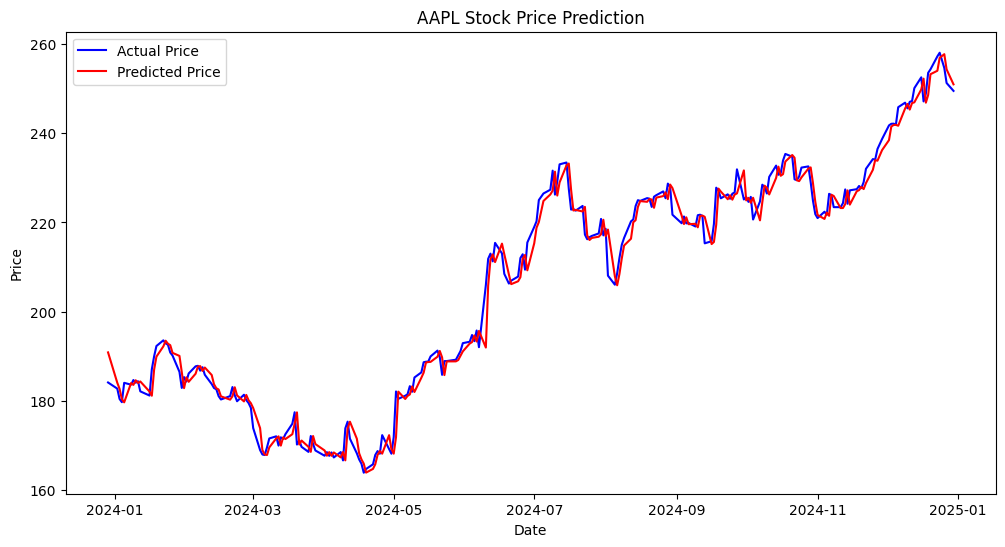

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()